In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def calculate_step(n, cache = {}):
    assert n >= 1, "n must be >= 1"
    count = 0
    original = n
    while n != 1:
        if n in cache: # Hit cache
            cache[original] = count + cache[n]
            return cache[original]
        
        if n % 2 == 0:
            n = n // 2
            count += 1
        else:
            n = (3 * n + 1) // 2
            count += 2
    cache[original] = count
    return count

In [3]:
N = 1000000
cache = {} # memorization FTW

In [4]:
numbers = np.array([i for i in range(1, N)])
steps = np.array([calculate_step(n, cache) for n in numbers])

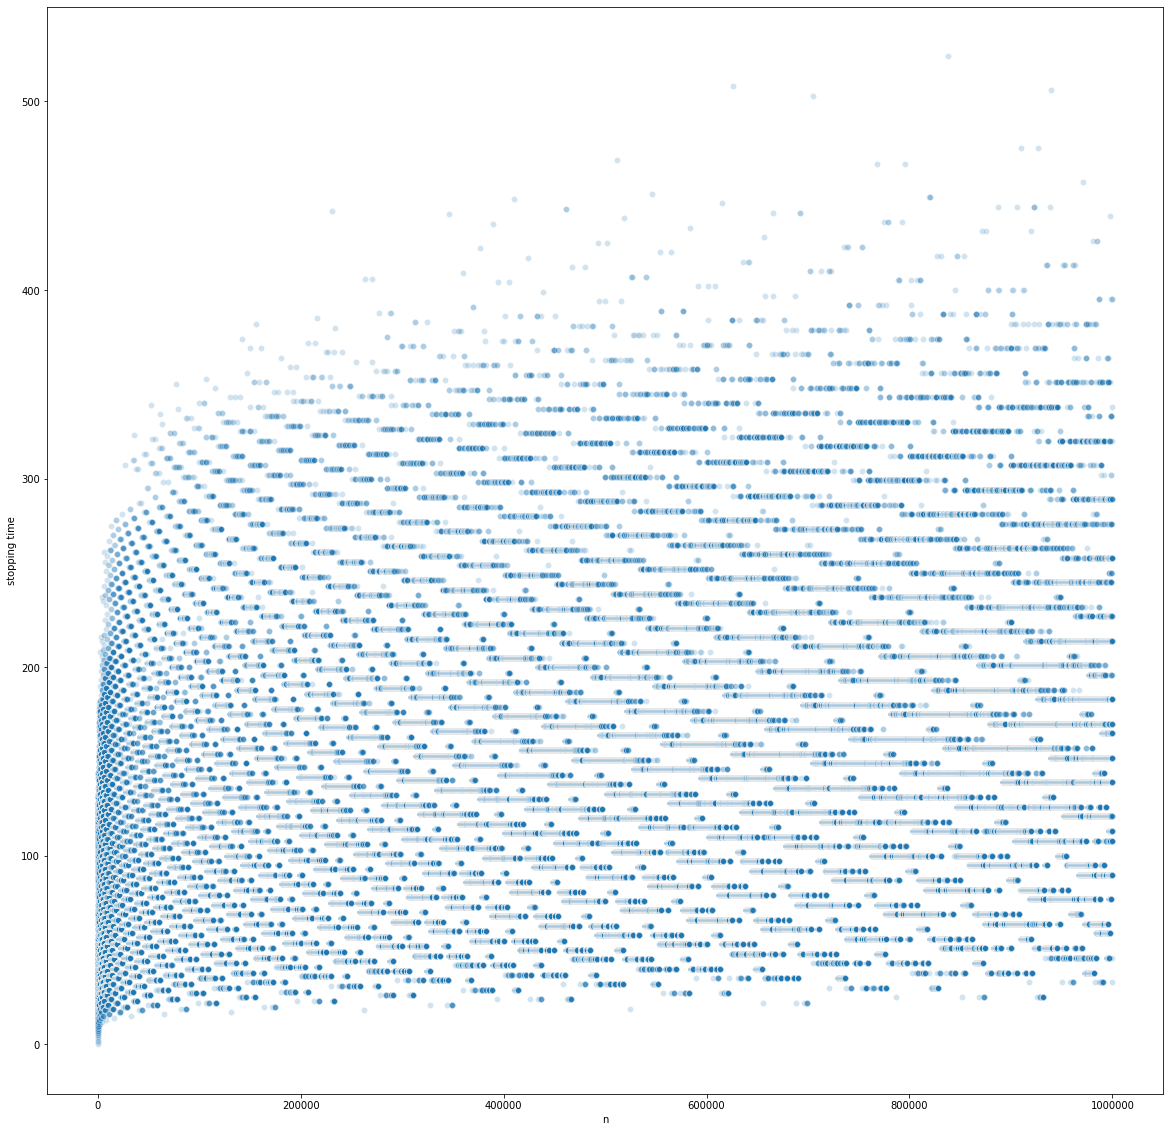

In [5]:
f, ax = plt.subplots(figsize=(20, 20))
ax.set(xlabel="n", ylabel="stopping time")
sns.scatterplot(x=numbers, y=steps, ax=ax, marker='o', alpha=0.2)

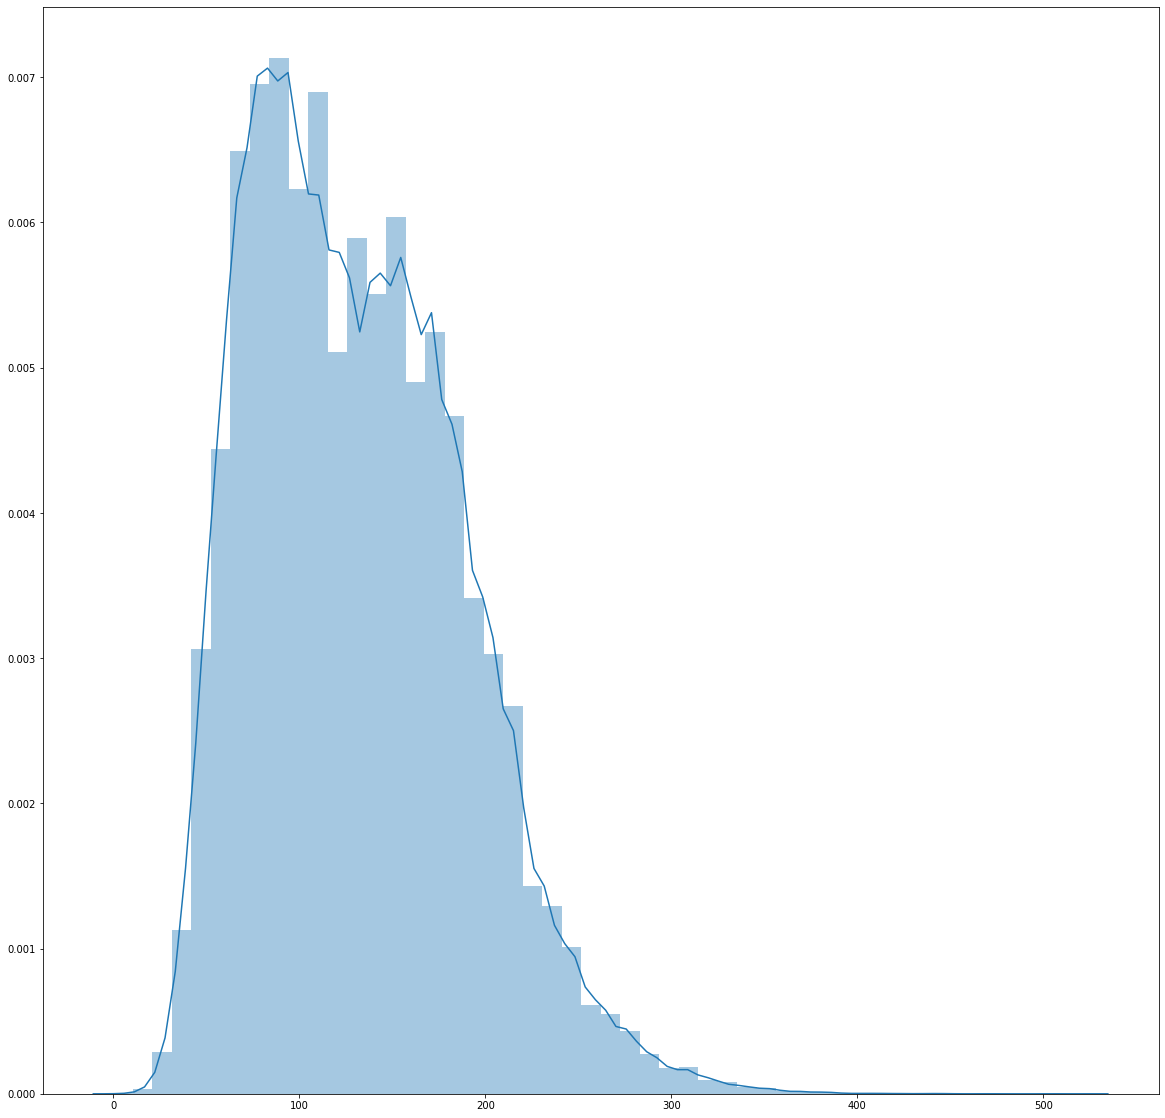

In [6]:
f, ax = plt.subplots(figsize=(20, 20))
sns.distplot(steps, ax=ax)